## Pandas Kütüphanesi

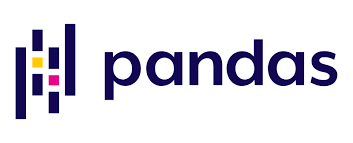

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
#pandas kütüphanesini içe aktarma
import pandas as pd

In [5]:
#versiyon kontrolü
pd.__version__

'2.0.3'

## Series

In [6]:
#Listelerden Seri oluşturma
isimler=pd.Series(["Ali","Veli","Ayse"])
isimler

0     Ali
1    Veli
2    Ayse
dtype: object

In [7]:
type(isimler)

pandas.core.series.Series

In [8]:
isimler[0] # İlk isim

'Ali'

In [10]:
isimler[0:2] #ilk iki isim indexleri 0 ve 1 olan

0     Ali
1    Veli
dtype: object

In [27]:
isimler[isimler.str.startswith("A")] #A ile başlayan isimleri bul

0    Ahmet
2     Ayse
dtype: object

In [29]:
isimler[0]='Ahmet'#değeri değiştirme
isimler

0    Ahmet
1     Veli
2     Ayse
dtype: object

In [37]:
#isimlerin kucuk harfe cevirme
isimler=isimler.str.lower()
isimler

0    ahmet
1     veli
2     ayse
dtype: object

In [45]:
#herhangi bir değerin kaç defa olduğunu
sonuc = (isimler == 'ahmet').sum()
print(sonuc)

1


In [48]:
#isimnlerde kaç farklı isim var 
isimler.nunique()

3

In [49]:
isimler.unique()

array(['ahmet', 'veli', 'ayse'], dtype=object)

In [50]:
isimler.value_counts()

ahmet    1
veli     1
ayse     1
Name: count, dtype: int64

In [52]:
takimlar=pd.Series(["Fenerbahce","Besiktas","Trabzonspor","Galatasaray",
                   "Fenerbahce","Galatasaray","Trabzonspor","Galatasaray",
                   "Fenerbahce","Besiktas",
                   "Fenerbahce"])

In [53]:
takimlar.value_counts()

Fenerbahce     4
Galatasaray    3
Besiktas       2
Trabzonspor    2
Name: count, dtype: int64

<Axes: >

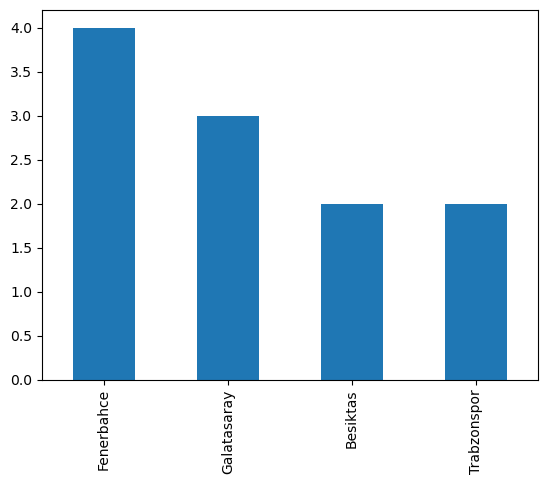

In [56]:
takimlar.value_counts().plot(kind="bar")

In [39]:
#İçinde olup olmadığı
isimler.isin(['ahmet'])

0     True
1    False
2    False
dtype: bool

In [25]:
puanlar=pd.Series([60,70,80,90]) #seri oluşturma
puanlar

0    60
1    70
2    80
3    90
dtype: int64

In [16]:
puanlar.mean() #ortalama

75.0

In [18]:
puanlar.std() #standart sapma

12.909944487358056

In [35]:
puanlar[puanlar>70] # Filtreleme puanı 70 den büyük olanları getir

2    80
3    90
dtype: int64

In [36]:
#Tüm puanları arttırma
puanlar_arti=puanlar+10
puanlar_arti

0     70
1     80
2     90
3    100
dtype: int64

Zaman indeksli seri oluşturma

In [20]:
uretim_miktarlari=pd.Series([100,200,300,400],index=["p1","p2","p3","p4"])
uretim_miktarlari

p1    100
p2    200
p3    300
p4    400
dtype: int64

In [21]:
uretim_miktarlari.sum() #toplam

1000

In [24]:
#tarih saat kütüphanemiz
import datetime
tarihler=pd.date_range("2024-01-01",periods=10,freq="M") # belirli bir tarih aralığında peryodik tarihler oluştur
uretim_miktarlari=pd.Series([100,200,300,400,700,1000,1600,2500,3200,4000],index=tarihler)
uretim_miktarlari

2024-01-01     100
2024-01-02     200
2024-01-03     300
2024-01-04     400
2024-01-05     700
2024-01-06    1000
2024-01-07    1600
2024-01-08    2500
2024-01-09    3200
2024-01-10    4000
Freq: D, dtype: int64

<Axes: >

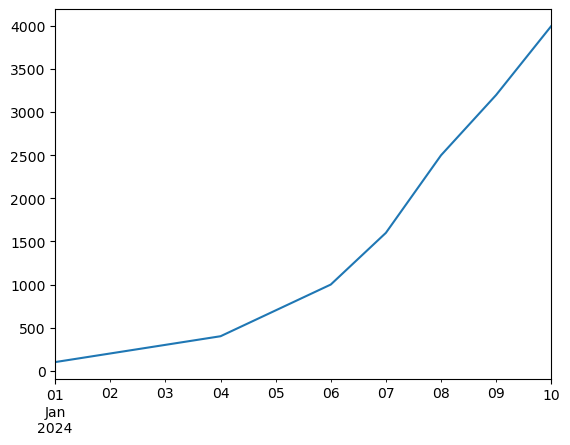

In [67]:
uretim_miktarlari.plot() # hzılı ve basit grafikler

In [57]:
puanlar=pd.Series({"Ali":80,
                  "Veli":70,
                  "Ayse":90})
puanlar

Ali     80
Veli    70
Ayse    90
dtype: int64

In [68]:
puanlar.index #index isimlerini getirir

Index(['Ali', 'Veli', 'Ayse'], dtype='object')

In [63]:
puanlar.dtype

dtype('int64')

## Data Frame

In [65]:
df=pd.DataFrame({"isim":["Ali","Veli","Ayse"],
                "puan":[80,70,90],
               "cinsiyet":["E","E","K"]})
df

,isim,puan,cinsiyet
0,Ali,80,E
1,Veli,70,E
2,Ayse,90,K


In [66]:
type(df['isim']) # her  bir sütun aslında bir series

pandas.core.series.Series

## Titanic ile Pandas Veri Analizi

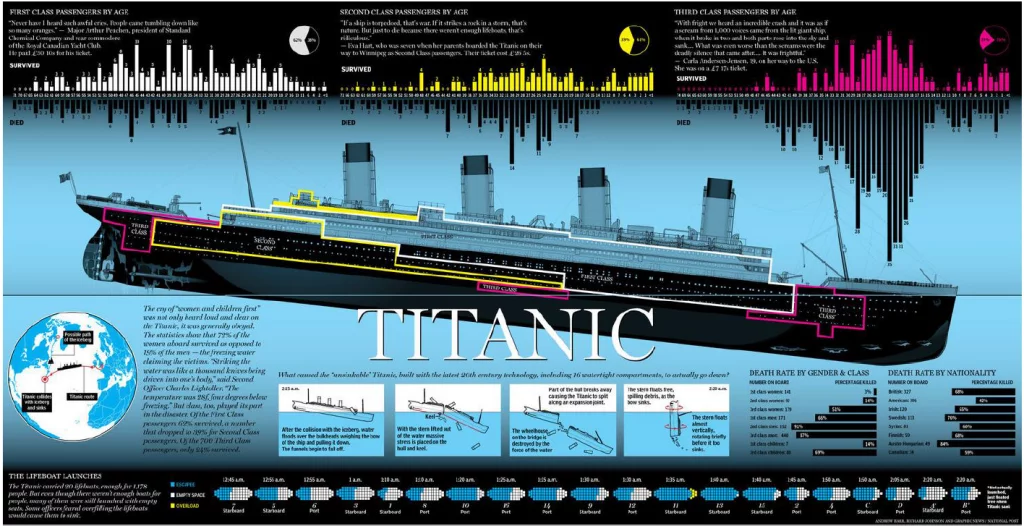

# Örnek Veri Analizi

## 1. Kütüphaneleri Yükle veya içe aktar

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #temel veri görselleştirme kütüphanesi
import seaborn as sns #daha görsel bir veri görselleştirme kütüphanesi

## 2. Veri dosyasını yükleme

In [70]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\Techist\ders4

28.05.2024  19:53    <DIR>          .
28.05.2024  17:52    <DIR>          ..
28.05.2024  18:25    <DIR>          .ipynb_checkpoints
23.05.2024  17:52           109.988 1-1024x526.png
28.05.2024  19:53           223.375 ders4_pandas_kutuphanesi.ipynb
24.12.2021  14:53            61.194 Titanic-Dataset.csv
               3 File(s)        394.557 bytes
               3 Dir(s)   9.753.989.120 bytes free


In [73]:
df=pd.read_csv("Titanic-Dataset.csv")

## 3. Keşifsel Veri Analizi

### head()

In [75]:
#ilk 5 satıra bakmak
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.head(10) #ilk 10 satırı listeler

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### tail()

In [77]:
df.tail() #son 5 satırı listeler

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### info()

In [78]:
df.info()#data frame hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### describe()
Veri setinin betimsel istatistiklerini veriyor

In [81]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## isnull() eksik veri sayısı

In [120]:
df.isnull().sum() # tüm sütunlardaki eksik veri sayısı

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
kategorik değerler
unique : kategorilerin etiketleri, adları
top     : en çok tekrar eden değer
freq    : kategorideki sıklık

### Aritmetiksel işlemler

In [83]:
# basit bir şekilde bir sütunu seçmek
df["Name"] # yalnuızca isim sütunu seçmek öneridiğim kullanım

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [84]:
type(df["Name"])

pandas.core.series.Series

In [85]:
df[['Name', 'Age']] #iç içe parantez ile birden fazla sütun seçme

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [93]:
df.Age #sütun seçme büyük harf küçük harf önemli

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [88]:
type(df[['Name', 'Age']]) #birden fazla sütun dataframe

pandas.core.frame.DataFrame

In [90]:
df['Age'].max() #maximum yaşı bul

80.0

In [91]:
#filtreleme işlemi
df[df["Age"] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [92]:
df[df["Age"] == df['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [94]:
df['Age'].mean() #Yaş ortalamasını bulduk

29.69911764705882

In [123]:
df[['Age','Fare']].mean() #birden fgazla sütun için ortalama

Age     29.699118
Fare    32.204208
dtype: float64

In [124]:
type(df[['Age','Fare']].mean())

pandas.core.series.Series

In [126]:
df[['Age','Fare']].mean()[0]#ilk eleman yaşın değerini al

29.69911764705882

In [122]:
df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [96]:
df['Age'].min() #minumum yaş

0.42

In [97]:
df[df['Age']==df['Age'].min()] # bebeğin kim olduğunu bulalım

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [98]:
df['Age'].std() #standart sapma

14.526497332334044

In [100]:
#yaşı 50'den küçüklerin listesi
df[df['Age']<50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [102]:
#yaşı 50 den küçük erkeklerin listesi
#(koşul1) & (koşul2) 
df[(df['Age']<50) & (df['Sex']=='male') & (df['Survived']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


In [111]:
df['Age'].describe() # yalnızca bir  sütunun betimsel istatistyiklerini verir

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [104]:
df_50alti_surv_male_list=df[(df['Age']<50) & (df['Sex']=='male') & (df['Survived']==1)]
df_50alti_surv_male_list

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


### Kategorik işlemler

### value_counts() kattegorik etiketlerin sayıları

In [106]:
df['Sex'].value_counts() #kadin ve erkek sayısı

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

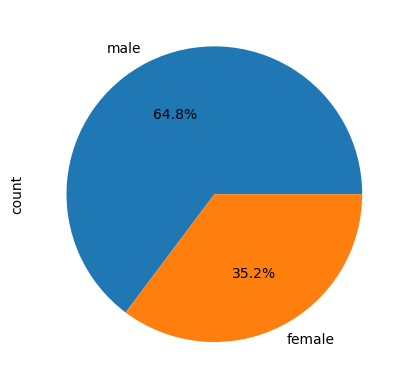

In [113]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [116]:
df.Sex.isnull() #koşulu sağlama dureumunu yazıyor

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [117]:
df.Sex.isnull().sum() # eksik veri sayısının toplamı

0

In [127]:
df['Embarked'].unique() #kategori etiketlerini verir

array(['S', 'C', 'Q', nan], dtype=object)

In [128]:
df['Embarked'].nunique() #kaç farklı kategori olduğunu verir

3